## TEXT RANK on Clusters 

To get top ranked relevant sentences in the cluster for in-depth cluster analysis.

In [22]:
from sentence_transformers import SentenceTransformer
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse

In [24]:
import pandas as pd

df = pd.read_csv('data/cluster.csv')

In [25]:
import numpy as np
from tqdm import tqdm
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

def getData(cluster):
    all_words = ''.join([word for word in df[df['Label'] == cluster]['Speech']]).replace('\n', '.')
    df_analysis = pd.DataFrame(all_words.split('.'), columns=['Speech'])
    df_analysis = df_analysis.loc[df_analysis['Speech'].str.split(' ').apply(len) > 8]
    df_analysis.reset_index(inplace=True,drop=True)
    return all_words, df_analysis

def textRank(df_analysis):

    bert_embeddings = bmodel.encode(df_analysis['Speech'])
    a = bert_embeddings[0]
    b = bert_embeddings[1]
    cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
    
    M = np.eye(bert_embeddings.shape[0])

    for i,a in tqdm(enumerate(bert_embeddings)):
        for j,b in enumerate(bert_embeddings):
            if i != j:
                M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
                
    similarity_graph = networkx.from_numpy_array(M)
    return similarity_graph


In [26]:
def analysis(cluster):
    allword0, df0 = getData(cluster)
    similarity_graph = textRank(df0)
    plt.figure(figsize=(14, 8))
    networkx.draw_networkx(similarity_graph, node_color='lime')
    scores=networkx.pagerank(similarity_graph,tol=1.0e-3)
    nx_ranked_sentences = sorted(((score, index) for index, score in scores.items()),reverse=True)
    print('Top ranked/relevant sentences in Cluster are ')
    for i in range(0, len(nx_ranked_sentences[:10])):
        print('Sentence ', i)
        print(df0.iloc[nx_ranked_sentences[i][1]]['Speech'])

661it [00:06, 106.39it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
" that means tens millions new foreign workers compete jobs, wages, futures  selling future young american, backgrounds, enrich donors let happen
Sentence  1
 thank you business long time know deal making let tell you, deal catastrophic america, israel whole middle east
Sentence  2
 the political powers trying stop people who stripped jobs form inner cities, trapped millions african-americans hispanic-americans impoverished, crime-besieged neighborhoods, left million american women child poverty near brink poverty center assault american prosperity clinton machine
Sentence  3
 yet, money spent lives lost, clinton policies secretary state left middle east disarray ever before
Sentence  4
 and going get things solved going lots wonderful things country, importantly today introduce man partner campaign, white house, fix rigged system -- rigged, rigged system -- make america safe make america great again want also address islamic t

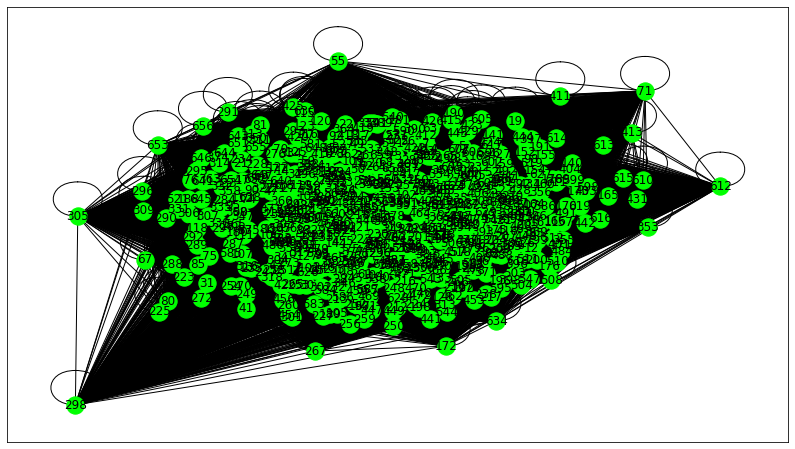

In [27]:
analysis(0)

987it [00:13, 74.66it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
 that factories closing day, average living greatest jobs theft history world win, day one, going announce plans renegotiate nafta get deal want leave nafta start get much better deal going start making things america again part plan bring back jobs, going lower business tax percent percent lower taxes massively americans  hillary raise taxes massively
Sentence  1
" the policies hillary clinton produced death destruction overseas, produced failing schools, rising crime, job loss, shrinking incomes, tragic poverty home american households single member labor force
Sentence  2
 yet, hillary clinton wants 550% increase syrian refugees running president world running president united states america first going build border wall, enforce laws, keep radical islamic terrorists country also going end government corruption hillary clinton put emails illegal secret server open foreign hacking
Sentence  3
 florida lost manufacturing jobs 

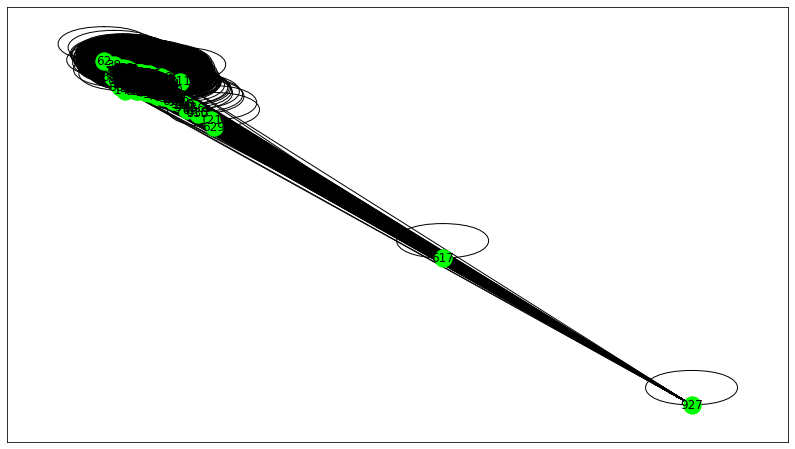

In [28]:
### Text Rank on Cluster 1
analysis(1)

913it [00:11, 78.37it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
 and actions help save next thousand american citizens losing brothers, sisters, sons, daughters parents
Sentence  1
 this include complete revitalization manufacturing sector, badly hurt hillary clinton policies bringing jobs back country going renegotiate nafta, keep trans-pacific partnership, stand china, fight every last american job
Sentence  2
 her policies created disaster overseas, poverty home running reverse failures, create new american future
Sentence  3
 that means end war coal rescind coal mining lease moratorium, excessive interior department stream rule, conduct top-down review anti-coal regulations issued obama administration eliminate highly-invasive "waters" rule, scrap trillion dollar obama-clinton climate action plan clean power plan  unilateral plans increase monthly electric bills double-digits without measurable improvement climate refocus epa core mission ensuring clean air, clean, safe drinking water a

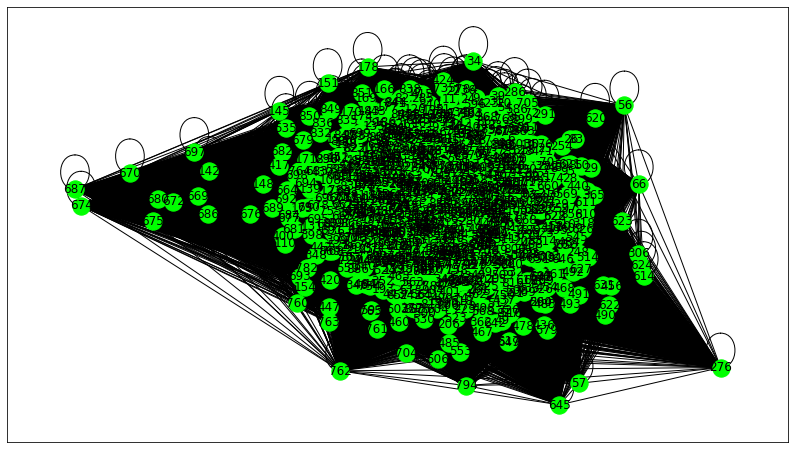

In [29]:
### Text Rank on Cluster 2
analysis(2)

849it [00:09, 92.98it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
 hillary clinton running, running change running american people american voters find special fork road, repeat mistakes past choose believe great future yet unwritten still lies ahead wonderful beloved country think does know does economic plan deliver least million jobs one decade
Sentence  1
 that contract with the american voter begins plan end government corruption take country back special interests want entire corrupt washington establishment hear heed words say
Sentence  2
 your companies leaving country trump administration going rich country again also going end government corruption
Sentence  3
 and lied line sand, right? she lied part plan bring back jobs going lower taxes american business percent percent also cancel billions global warming payments united nations  use money support america vital environmental infrastructure natural resources spending hundreds billions dollars even know who money gonna spend money h

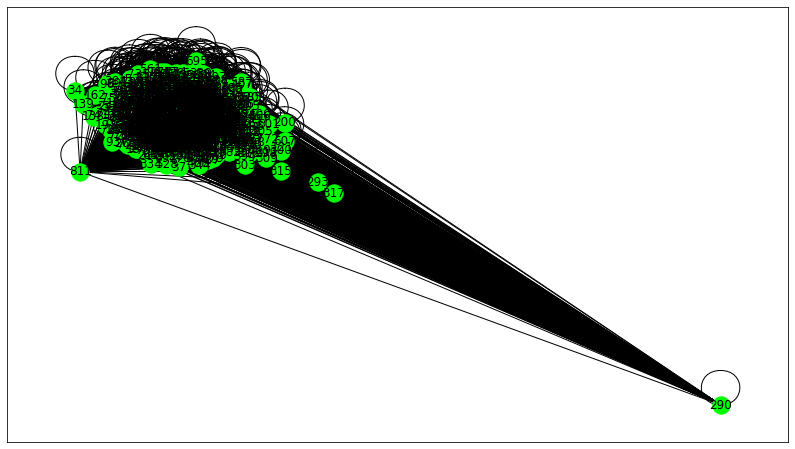

In [31]:
analysis(3)

1146it [00:15, 72.54it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
 crooked hillary going raise taxes going cut taxes regulations going reduce costs education way going end common core bringing education local going lift restrictions american energy deliver real change great american people; time
Sentence  1
  and closing, strong, country rich again debtor nation poor going make america rich again enemy—our enemies unbelievable
Sentence  2
 ours campaign future future, going pursue new trade policies put american workers first  keep jobs country
Sentence  3
 our country going country proud again going use american steel going use american labor, going come first deals going make trade deal come fifth sixth seventh countries laugh stupidity going build great companies going expand companies poorly going make country rich again going make country safe again going make america strong again
Sentence  4
 for first time american history, endorsement ice officers border patrol officers going build bo

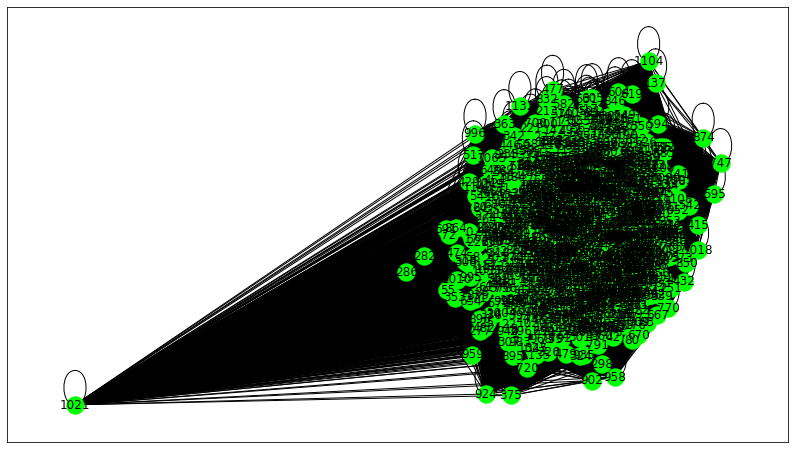

In [32]:
analysis(4)

428it [00:02, 187.78it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
" just like wants put steel workers business going put miners steel workers back work  going get energy bills down going repeal replace obamacare, saving another million jobs next decade going create jobs people, going fight ensure every young african-american latino child put ladder american success: good education, great job
Sentence  1
 come november 8th, going government serves you, family, country going rebuild depleted military, avoid needless foreign wars, build new friendships overseas, remember three famous words: peace through strength going work allies crush, defeat, utterly destroy isis going new immigration screening test keep people country support tolerant values tax reforms add millions new jobs thousands new small businesses energy reforms create millions new jobs lower prince energy bill trade reforms raise wages, grow jobs add trillions new wealth country immigration reforms protect jobs stop businesses explo

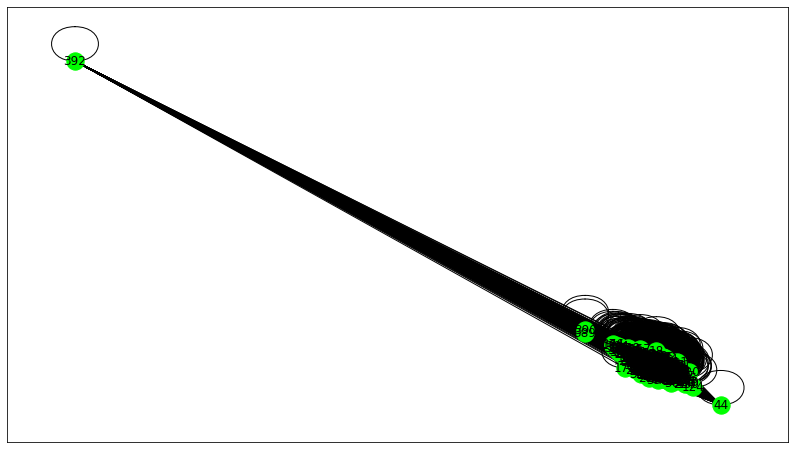

In [33]:
analysis(5)

559it [00:03, 141.80it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
 your city lost one-third manufacturing jobs since bill clinton signed nafta  deal supported hillary clinton,000 factories shut left united states since china entered world trade organization
Sentence  1
 yesterday rolled plan help mothers families get affordable, quality childcare children policy policy, going bring opportunity prosperity americans going lower taxes going get rid massive amounts unnecessary regulations, business life going repeal replace obamacare going appoint justices supreme court follow constitution going rebuild depleted military take care vets going save 2nd amendment nra endorsement going stop illegal immigration drugs coming country, yes, build wall mexico pay going, importantly, renegotiate horrible trade deals, especially nafta  single worst trade deal ever made country anywhere world one-way street jobs united states  make great trade deals put american worker first
Sentence  2
 and companies leav

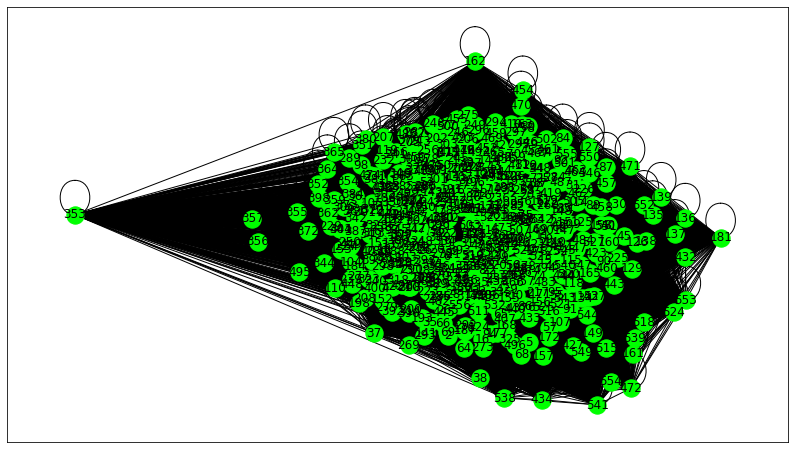

In [34]:
analysis(6)

553it [00:03, 147.54it/s]


Top ranked/relevant sentences in Cluster are 
Sentence  0
 this dark moment america history radical islamic terrorist targeted nightclub wanted kill americans, order execute gay lesbian citizens sexual orientation strike heart soul nation assault ability free people live lives, love want express identity attack right every single american live peace safety country need respond attack america one united people  force, purpose determination
Sentence  1
 there compassion allowing drug dealers, gang members, felons prey innocent people first duty government keep innocent safe president fight safety every american  especially americans known safety very, long time asking vote every african-american citizen struggling country today wants different future time society address honest difficult truths
Sentence  2
 imagine many lives could saved, across country, democratic politicians blocked cities rudy new york city make sure deliver safe neighborhoods milwaukee, across country easy hillary 

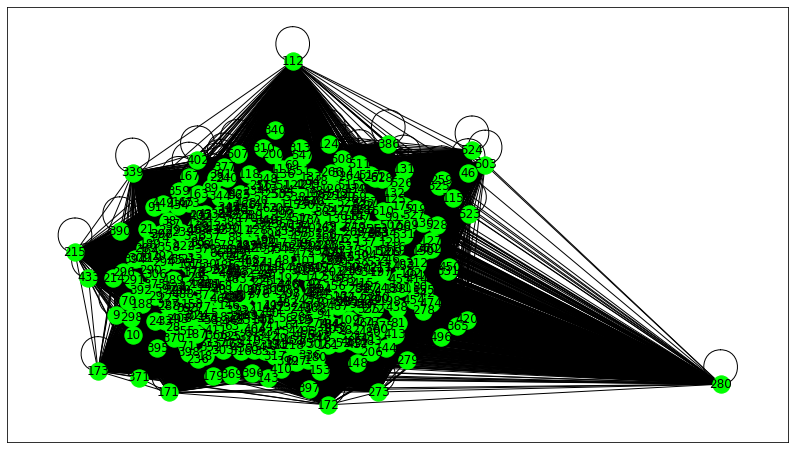

In [35]:
analysis(7)